## ML Modeling

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

from helper import *

import xgboost as xgb
import lightgbm as lgb

import joblib

In [2]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dias = pd.read_excel("DIAS Attributes - Values 2017.xlsx", header=1)
dias['Attribute'] = dias['Attribute'].ffill()

In [4]:
target = mailout_train['RESPONSE']
mailout_train.drop(['RESPONSE'], inplace=True, axis=1)
mailout_train.drop(['LNR'], inplace=True, axis=1)

In [5]:
mailout_train_eng = preprocess(mailout_train, dias)

Dropping columns with high percentage of missing values ['AGER_TYP', 'ALTER_HH', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'TITEL_KZ']
label encoding CAMEO_DEU_2015
label encoding D19_LETZTER_KAUF_BRANCHE
Convert CAMEO_DEUG_2015 str to float
Mapping OST_WEST_KZ categorical
Splitting CAMEO_INTL_2015 Feature into 2 features FAMILY and WEALTH
Splitting LP_LEBENSPHASE_FEIN into two features INCOME and AGE
Splitting PRAEGENDE_JUGENDJAHRE into two DECADE and MOVEMENT
Get the registeration year from EINGEFUEGT_AM
Dropping unwanted columns ['CAMEO_INTL_2015', 'LP_LEBENSPHASE_FEIN', 'PRAEGENDE_JUGENDJAHRE', 'EINGEFUEGT_AM']
Imputing missing values with most frequent value


LGBM
LGBM: 0.713093 (0.016574)
roc auc train score = 0.99
roc auc validation score = 0.71



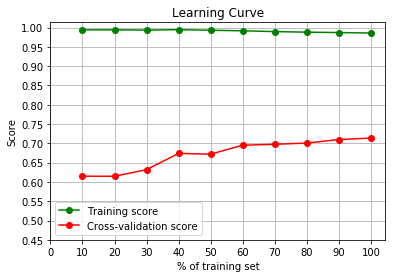

XGB


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

XGB: 0.681090 (0.012542)


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

roc auc train score = 0.99
roc auc validation score = 0.68



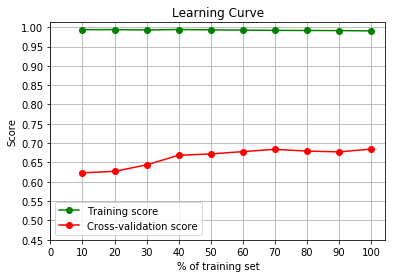

CPU times: user 1h 2min 25s, sys: 13.2 s, total: 1h 2min 38s
Wall time: 1h 3min 8s


In [10]:
%%time
models = create_baseline_models()
names, results = compare_models(mailout_train, target, models, curve=True)

RF
RF: 0.609228 (0.021233)
roc auc train score = 0.98
roc auc validation score = 0.61



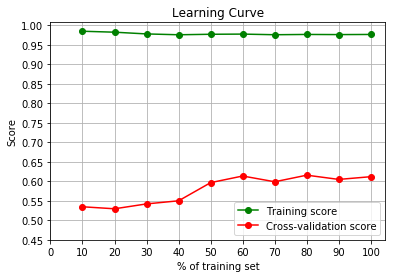

In [7]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42
models = []
models.append(('RF', RandomForestClassifier(n_estimators=250, random_state=SEED)))
names, results = compare_models(mailout_train_eng, target, models, curve=True)

In [6]:
%%time
models = create_baseline_models() # unscaled
names, results = compare_models(mailout_train_eng, target, models)
baseline_score_df = pd.DataFrame({'Model':names, 'Score': results})
display(baseline_score_df)

Model: LGBM; Mean-AUC: 0.7059; Std: 0.0229; Training time: 1.14 min
Model: GB; Mean-AUC: 0.7526; Std: 0.0268; Training time: 4.73 min
Model: RF; Mean-AUC: 0.6092; Std: 0.0212; Training time: 2.85 min
Model: LogR; Mean-AUC: 0.6638; Std: 0.0196; Training time: 2.04 min
Model: MLP; Mean-AUC: 0.5828; Std: 0.0293; Training time: 2.58 min


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


Model: XGB; Mean-AUC: 0.6689; Std: 0.0271; Training time: 5.03 min


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


,Model,Score
0,LGBM,0.7059
1,GB,0.7526
2,RF,0.6092
3,LogR,0.6638
4,MLP,0.5828
5,XGB,0.6689


CPU times: user 18min 16s, sys: 2.68 s, total: 18min 19s
Wall time: 18min 22s


In [6]:
baseline_score_df = pd.DataFrame({'Model':['LGBM', 'SVC','LogR','GB','RF','MLP','XGB'], 
                                  'Score': [0.7059, 0.5197,0.6638,0.7526,0.6092,0.5828,0.6689]})

In [7]:
%%time
#models = get_scaled_models('standard') # Standard Scaled
models = create_baseline_models() 
mailout_train_standard = feature_scaling(mailout_train_eng, 'standard')
names, results = compare_models(mailout_train_standard, target, models) # Using Standard Scaled Data
standard_scaler_score_df = pd.DataFrame({'Standard-Model':names, 'Score': results})
score_df = pd.concat([baseline_score_df, standard_scaler_score_df], axis=1)
display(score_df)

Model: LGBM; Mean-AUC: 0.6998; Std: 0.0265; Training time: 1.21 min
Model: GB; Mean-AUC: 0.7526; Std: 0.0268; Training time: 4.72 min
Model: RF; Mean-AUC: 0.6106; Std: 0.0199; Training time: 2.89 min
Model: LogR; Mean-AUC: 0.6594; Std: 0.0155; Training time: 1.33 min
Model: MLP; Mean-AUC: 0.6232; Std: 0.0216; Training time: 3.9 min


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


Model: XGB; Mean-AUC: 0.6689; Std: 0.0271; Training time: 5.03 min


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


,Model,Score,Standard-Model,Score
0,LGBM,0.7059,LGBM,0.6998
1,GB,0.7526,GB,0.7526
2,RF,0.6092,RF,0.6106
3,LogR,0.6638,LogR,0.6594
4,MLP,0.5828,MLP,0.6232
5,XGB,0.6689,XGB,0.6689


CPU times: user 18min 58s, sys: 2.94 s, total: 19min 1s
Wall time: 19min 4s


In [8]:
%%time
models = create_baseline_models() 
mailout_train_minmax = feature_scaling(mailout_train_eng, 'minmax')
names, results = compare_models(mailout_train_minmax, target, models) # Using MinMax Scaled Data
min_max_score_df = pd.DataFrame({'MinMax-Model':names, 'Score': results})
score_df = pd.concat([baseline_score_df, standard_scaler_score_df, min_max_score_df], axis=1)
display(score_df)

Model: LGBM; Mean-AUC: 0.7058; Std: 0.0185; Training time: 0.75 min
Model: GB; Mean-AUC: 0.7526; Std: 0.0268; Training time: 4.68 min
Model: RF; Mean-AUC: 0.6115; Std: 0.0205; Training time: 2.75 min
Model: LogR; Mean-AUC: 0.6731; Std: 0.0176; Training time: 0.58 min
Model: MLP; Mean-AUC: 0.6007; Std: 0.0134; Training time: 9.07 min


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


Model: XGB; Mean-AUC: 0.6689; Std: 0.0271; Training time: 4.97 min


/opt/conda/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


,Model,Score,Standard-Model,Score,MinMax-Model,Score
0,LGBM,0.7059,LGBM,0.6998,LGBM,0.7058
1,GB,0.7526,GB,0.7526,GB,0.7526
2,RF,0.6092,RF,0.6106,RF,0.6115
3,LogR,0.6638,LogR,0.6594,LogR,0.6731
4,MLP,0.5828,MLP,0.6232,MLP,0.6007
5,XGB,0.6689,XGB,0.6689,XGB,0.6689


CPU times: user 22min 41s, sys: 2.61 s, total: 22min 44s
Wall time: 22min 48s


In [96]:
display(score_df)

,Model,Score,Model,Score,Model,Score
0,LGBM,0.70594,standardLGBM,0.700357,minmaxLGBM,0.705819


In [9]:
score_df

,Model,Score,Standard-Model,Score,MinMax-Model,Score
0,LGBM,0.7059,LGBM,0.6998,LGBM,0.7058
1,GB,0.7526,GB,0.7526,GB,0.7526
2,RF,0.6092,RF,0.6106,RF,0.6115
3,LogR,0.6638,LogR,0.6594,LogR,0.6731
4,MLP,0.5828,MLP,0.6232,MLP,0.6007
5,XGB,0.6689,XGB,0.6689,XGB,0.6689


### Hyperparameter Tuning of LGBM

In [8]:
mailout_train_minmax = feature_scaling(mailout_train_eng, 'minmax')

In [9]:
ITERATIONS = 200
SEED = 42
bayes_cv_tuner_lgbm = BayesSearchCV(
    estimator = lgb.LGBMClassifier(
        application='binary',
        metric='auc',
        n_jobs=-1,
        verbose=-1,
    ),
    search_spaces = {
        'learning_rate': (0.001, 0.25, 'uniform'),
        'n_estimators': (10, 200),
        'max_depth': (2, 10),
        'num_leaves': (20, 100),
        'colsample_bytree':(0.9, 1.0, 'uniform'),
        'max_bin': (500, 1000),
        #'min_data_in_leaf':(20, 100),
        'min_child_samples': (1, 50),
        'reg_alpha': (1e-9, 10.0, 'log-uniform'),
        'reg_lambda': (1e-10, 1.0, 'log-uniform'),      
        'scale_pos_weight': (1,150, 'uniform'),

},    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=SEED
    ),
    n_jobs = -1,
    n_iter = ITERATIONS,  
    verbose = 0,
    refit = True,
    random_state = SEED
)

In [10]:
def print_param(x):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner_lgbm.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner_lgbm.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner_lgbm.best_score_, 4),
        bayes_cv_tuner_lgbm.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner_lgbm.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [11]:
%%time
result_lgbm = bayes_cv_tuner_lgbm.fit(mailout_train_minmax, target,callback=print_param)

Model #1
Best ROC-AUC: 0.6089
Best params: OrderedDict([('colsample_bytree', 0.9410103958853314), ('learning_rate', 0.18220371005115393), ('max_bin', 966), ('max_depth', 5), ('min_child_samples', 34), ('n_estimators', 89), ('num_leaves', 48), ('reg_alpha', 0.024833752122391455), ('reg_lambda', 1.10823818604873e-07), ('scale_pos_weight', 98)])

Model #2
Best ROC-AUC: 0.6183
Best params: OrderedDict([('colsample_bytree', 0.9837388355553285), ('learning_rate', 0.2209455040678347), ('max_bin', 652), ('max_depth', 10), ('min_child_samples', 43), ('n_estimators', 22), ('num_leaves', 31), ('reg_alpha', 3.43458268604567e-06), ('reg_lambda', 0.00022766224742996492), ('scale_pos_weight', 143)])

Model #3
Best ROC-AUC: 0.6183
Best params: OrderedDict([('colsample_bytree', 0.9837388355553285), ('learning_rate', 0.2209455040678347), ('max_bin', 652), ('max_depth', 10), ('min_child_samples', 43), ('n_estimators', 22), ('num_leaves', 31), ('reg_alpha', 3.43458268604567e-06), ('reg_lambda', 0.00022766

Model #28
Best ROC-AUC: 0.7612
Best params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.001), ('max_bin', 1000), ('max_depth', 10), ('min_child_samples', 38), ('n_estimators', 10), ('num_leaves', 20), ('reg_alpha', 10.0), ('reg_lambda', 1e-10), ('scale_pos_weight', 150)])

Model #29
Best ROC-AUC: 0.7612
Best params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.001), ('max_bin', 1000), ('max_depth', 10), ('min_child_samples', 38), ('n_estimators', 10), ('num_leaves', 20), ('reg_alpha', 10.0), ('reg_lambda', 1e-10), ('scale_pos_weight', 150)])

Model #30
Best ROC-AUC: 0.7612
Best params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.001), ('max_bin', 1000), ('max_depth', 10), ('min_child_samples', 38), ('n_estimators', 10), ('num_leaves', 20), ('reg_alpha', 10.0), ('reg_lambda', 1e-10), ('scale_pos_weight', 150)])

Model #31
Best ROC-AUC: 0.7612
Best params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.001), ('max_bin', 1000), (

Model #55
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.946913879853184), ('learning_rate', 0.04799599894049769), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 28), ('num_leaves', 100), ('reg_alpha', 5.432508975487921e-09), ('reg_lambda', 5.280547754951558e-07), ('scale_pos_weight', 22)])

Model #56
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.946913879853184), ('learning_rate', 0.04799599894049769), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 28), ('num_leaves', 100), ('reg_alpha', 5.432508975487921e-09), ('reg_lambda', 5.280547754951558e-07), ('scale_pos_weight', 22)])

Model #57
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.946913879853184), ('learning_rate', 0.04799599894049769), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 28), ('num_leaves', 100), ('reg_alpha', 5.432508975487921e-09), ('reg_lambda', 5.280

Model #81
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

Model #82
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

Model #83
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

Model #84
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning

Model #109
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

Model #110
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

Model #111
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

Model #112
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('lear

Model #136
Best ROC-AUC: 0.7651
Best params: OrderedDict([('colsample_bytree', 0.9067157568436548), ('learning_rate', 0.06705000834338895), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 10.0), ('reg_lambda', 0.0002699247387376386), ('scale_pos_weight', 150)])

Model #137
Best ROC-AUC: 0.7651
Best params: OrderedDict([('colsample_bytree', 0.9067157568436548), ('learning_rate', 0.06705000834338895), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 10.0), ('reg_lambda', 0.0002699247387376386), ('scale_pos_weight', 150)])

Model #138
Best ROC-AUC: 0.7651
Best params: OrderedDict([('colsample_bytree', 0.9067157568436548), ('learning_rate', 0.06705000834338895), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 10.0), ('reg_lambda', 0.0002699247387376386), ('scale_pos_weight', 

Model #161
Best ROC-AUC: 0.7688
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.09643003862369257), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 0.8796958374226569), ('reg_lambda', 1.0), ('scale_pos_weight', 150)])

Model #162
Best ROC-AUC: 0.7688
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.09643003862369257), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 0.8796958374226569), ('reg_lambda', 1.0), ('scale_pos_weight', 150)])

Model #163
Best ROC-AUC: 0.7688
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.09643003862369257), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 0.8796958374226569), ('reg_lambda', 1.0), ('scale_pos_weight', 150)])

Model #164
Best ROC-AUC: 0.7688
Best params: Orde

Model #187
Best ROC-AUC: 0.7688
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.09643003862369257), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 0.8796958374226569), ('reg_lambda', 1.0), ('scale_pos_weight', 150)])

Model #188
Best ROC-AUC: 0.7688
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.09643003862369257), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 0.8796958374226569), ('reg_lambda', 1.0), ('scale_pos_weight', 150)])

Model #189
Best ROC-AUC: 0.7688
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.09643003862369257), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 50), ('n_estimators', 10), ('num_leaves', 100), ('reg_alpha', 0.8796958374226569), ('reg_lambda', 1.0), ('scale_pos_weight', 150)])

Model #190
Best ROC-AUC: 0.7688
Best params: Orde

Best params: 0.76 OrderedDict([('colsample_bytree', 0.9238574532834115), ('learning_rate', 0.01), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 40), ('num_leaves', 89), ('reg_alpha', 10.0), ('reg_lambda', 0.02596034024971144), ('scale_pos_weight', 80)])


Model #50
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.946913879853184), ('learning_rate', 0.04799599894049769), ('max_bin', 1000), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 28), ('num_leaves', 100), ('reg_alpha', 5.432508975487921e-09), ('reg_lambda', 5.280547754951558e-07), ('scale_pos_weight', 22)])

Model #102
Best ROC-AUC: 0.7644
Best params: OrderedDict([('colsample_bytree', 0.9), ('learning_rate', 0.06184798151304283), ('max_bin', 752), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 74), ('num_leaves', 100), ('reg_alpha', 1e-09), ('reg_lambda', 1e-10), ('scale_pos_weight', 34)])

In [12]:
bayes_lgbm = bayes_cv_tuner_lgbm.best_estimator_
bayes_lgbm

LGBMClassifier(application='binary', colsample_bytree=0.9,
               learning_rate=0.09643003862369257, max_bin=1000, max_depth=2,
               metric='auc', min_child_samples=50, n_estimators=10,
               num_leaves=100, reg_alpha=0.8796958374226569, reg_lambda=1.0,
               scale_pos_weight=150, verbose=-1)

In [13]:
bayes_lgbm.fit(mailout_train_minmax, target)

LGBMClassifier(application='binary', colsample_bytree=0.9,
               learning_rate=0.09643003862369257, max_bin=1000, max_depth=2,
               metric='auc', min_child_samples=50, n_estimators=10,
               num_leaves=100, reg_alpha=0.8796958374226569, reg_lambda=1.0,
               scale_pos_weight=150, verbose=-1)

In [14]:
joblib.dump(bayes_lgbm, 'lgbm_200.pkl')

['lgbm_200.pkl']

### Hyperparameter Tuning of GB

In [15]:
ITERATIONS = 50
SEED = 42
bayes_cv_tuner_gb = BayesSearchCV(
    estimator = GradientBoostingClassifier(
        #application='binary',
        #criterion='auc',
        #n_jobs=-1,
        #verbose=-1,
    ),
    search_spaces = {
        'learning_rate': (0.001, 0.25, 'uniform'),
        'n_estimators': (50, 2000),
        'max_depth': (2, 10),
        'min_samples_split':(2, 100),
        'min_samples_leaf': (1, 10),
        'max_features': (10, 30),
        'subsample':(0.7, 1.0),
},    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=SEED
    ),
    n_jobs = -1,
    n_iter = ITERATIONS,  
    #verbose = 0,
    refit = True,
    random_state = SEED
)

def print_param(x):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner_gb.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner_gb.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner_gb.best_score_, 4),
        bayes_cv_tuner_gb.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner_gb.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [16]:
%%time
result_gb = bayes_cv_tuner_gb.fit(mailout_train_minmax, target,callback=print_param)

Model #1
Best ROC-AUC: 0.6413
Best params: OrderedDict([('learning_rate', 0.10311588575447515), ('max_depth', 8), ('max_features', 29), ('min_samples_leaf', 4), ('min_samples_split', 68), ('n_estimators', 858), ('subsample', 0.8052794004697432)])

Model #2
Best ROC-AUC: 0.6469
Best params: OrderedDict([('learning_rate', 0.20950970053276782), ('max_depth', 9), ('max_features', 16), ('min_samples_leaf', 10), ('min_samples_split', 87), ('n_estimators', 172), ('subsample', 0.7414925614835726)])

Model #3
Best ROC-AUC: 0.6469
Best params: OrderedDict([('learning_rate', 0.20950970053276782), ('max_depth', 9), ('max_features', 16), ('min_samples_leaf', 10), ('min_samples_split', 87), ('n_estimators', 172), ('subsample', 0.7414925614835726)])

Model #4
Best ROC-AUC: 0.709
Best params: OrderedDict([('learning_rate', 0.20328660110098348), ('max_depth', 3), ('max_features', 22), ('min_samples_leaf', 8), ('min_samples_split', 53), ('n_estimators', 236), ('subsample', 0.9267401598507645)])

Model #

Model #36
Best ROC-AUC: 0.7521
Best params: OrderedDict([('learning_rate', 0.001), ('max_depth', 6), ('max_features', 30), ('min_samples_leaf', 10), ('min_samples_split', 2), ('n_estimators', 2000), ('subsample', 0.7195263583720765)])

Model #37
Best ROC-AUC: 0.7521
Best params: OrderedDict([('learning_rate', 0.001), ('max_depth', 6), ('max_features', 30), ('min_samples_leaf', 10), ('min_samples_split', 2), ('n_estimators', 2000), ('subsample', 0.7195263583720765)])

Model #38
Best ROC-AUC: 0.7521
Best params: OrderedDict([('learning_rate', 0.001), ('max_depth', 6), ('max_features', 30), ('min_samples_leaf', 10), ('min_samples_split', 2), ('n_estimators', 2000), ('subsample', 0.7195263583720765)])

Model #39
Best ROC-AUC: 0.7521
Best params: OrderedDict([('learning_rate', 0.001), ('max_depth', 6), ('max_features', 30), ('min_samples_leaf', 10), ('min_samples_split', 2), ('n_estimators', 2000), ('subsample', 0.7195263583720765)])

Model #40
Best ROC-AUC: 0.7521
Best params: OrderedDict(

In [17]:
bayes_gb = bayes_cv_tuner_gb.best_estimator_
bayes_gb

GradientBoostingClassifier(learning_rate=0.001, max_depth=6, max_features=30,
                           min_samples_leaf=10, n_estimators=2000,
                           subsample=0.7195263583720765)

In [18]:
bayes_gb.fit(mailout_train_minmax, target)

GradientBoostingClassifier(learning_rate=0.001, max_depth=6, max_features=30,
                           min_samples_leaf=10, n_estimators=2000,
                           subsample=0.7195263583720765)

In [19]:
joblib.dump(bayes_lgbm, 'gb_50.pkl')

['gb_50.pkl']